In [623]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_roc_curve
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [624]:
os.getcwd()

'C:\\Users\\oscar\\Downloads'

In [625]:
os.chdir('C:\\Users\\oscar\Downloads')

In [626]:
dataset = pd.read_excel('Telco_customer_churn (3).xlsx')

In [627]:
dataset.head(n=10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,No,Yes,No,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,Yes,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,No,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


In [628]:
dataset.drop(dataset[['Churn Score', 'Churn Reason']],axis=1, inplace=True)

In [629]:
dataset['Total Charges'] = pd.to_numeric(dataset['Total Charges'],errors='coerce')
dataset['Total Charges'] = dataset['Total Charges'].astype("float")

In [630]:
na_cols = dataset.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
for col in dataset.columns[1:]:
     if col in na_cols:
        if dataset[col].dtype != 'object':
             dataset[col] =  dataset[col].fillna(dataset[col].mean()).round(0)

In [631]:
dataset.isna().any()

CustomerID           False
Count                False
Country              False
State                False
City                 False
Zip Code             False
Lat Long             False
Latitude             False
Longitude            False
Gender               False
Senior Citizen       False
Partner              False
Dependents           False
Tenure Months        False
Phone Service        False
Multiple Lines       False
Internet Service     False
Online Security      False
Online Backup        False
Device Protection    False
Tech Support         False
Streaming TV         False
Streaming Movies     False
Contract             False
Paperless Billing    False
Payment Method       False
Monthly Charges      False
Total Charges        False
Churn Label          False
Churn Value          False
CLTV                 False
dtype: bool

In [632]:
dataset.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'CLTV'],
      dtype='object')

In [633]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [634]:
Univariate = dataset[['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']]


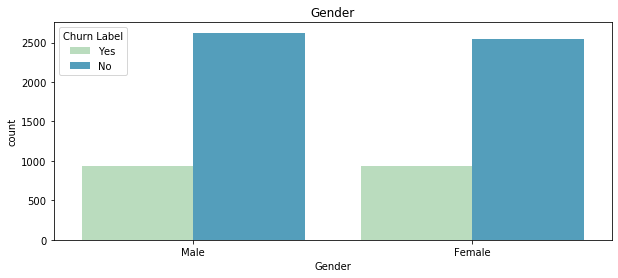

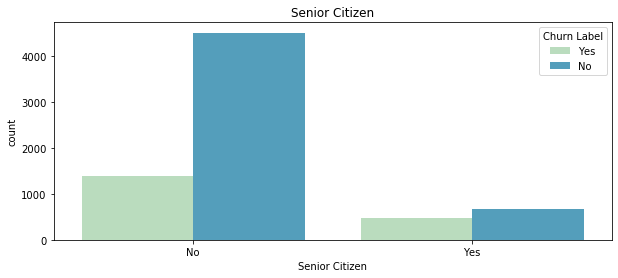

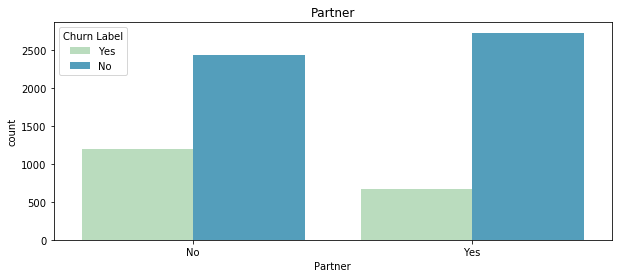

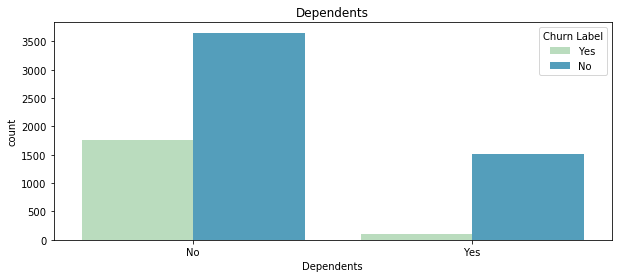

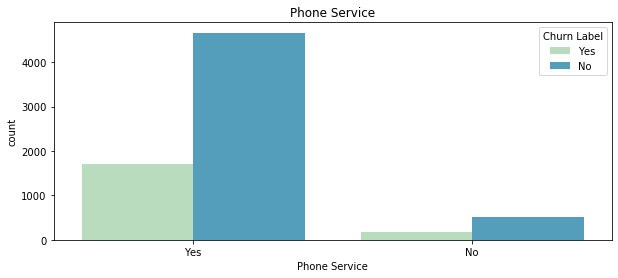

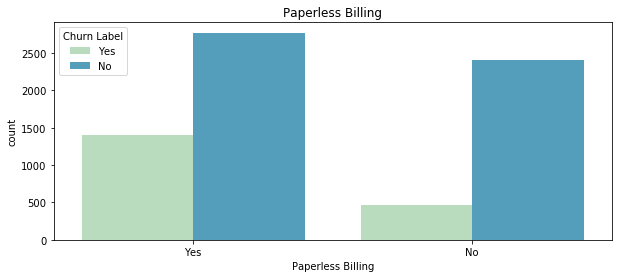

In [635]:
for col in Univariate:
    plt.figure(figsize=(10, 4))
    plt.title(col)
    ax = sns.countplot(data=dataset, x=col, palette= 'GnBu', hue= 'Churn Label')
    plt.show()

In [636]:
Multivariate = dataset[['Streaming TV', 'Streaming Movies', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Multiple Lines', 'Contract', 'Payment Method']]

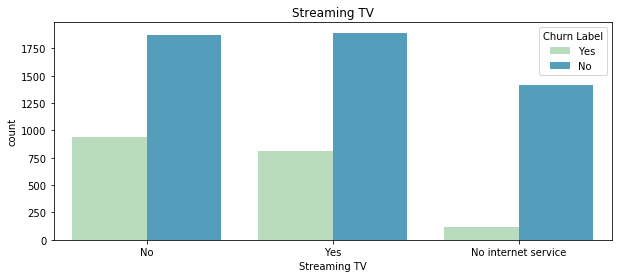

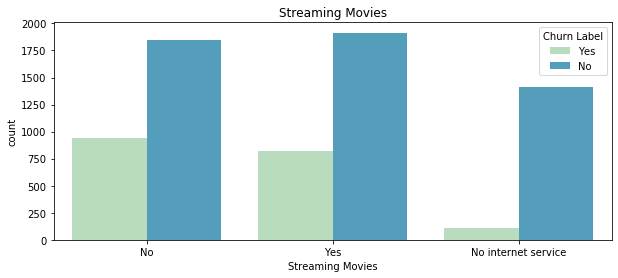

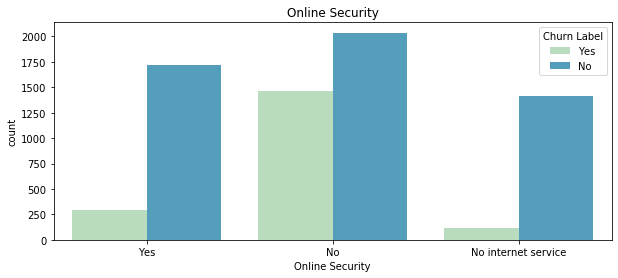

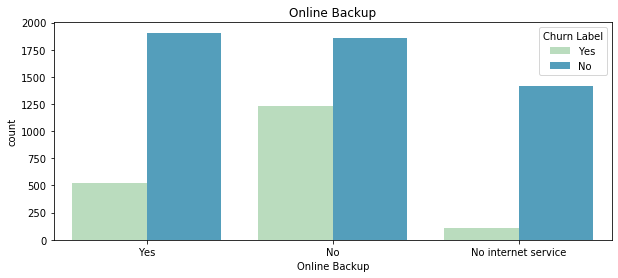

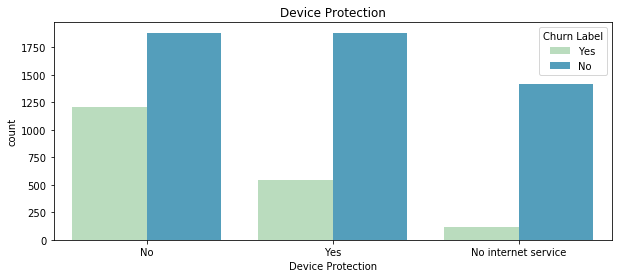

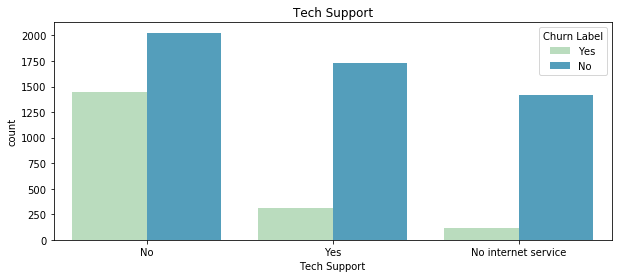

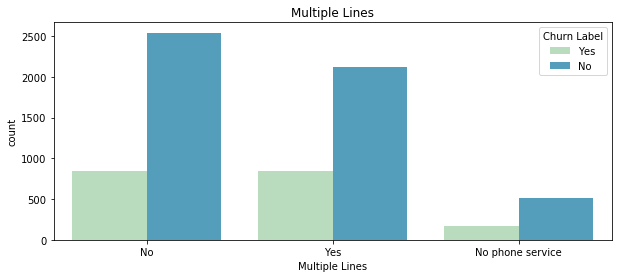

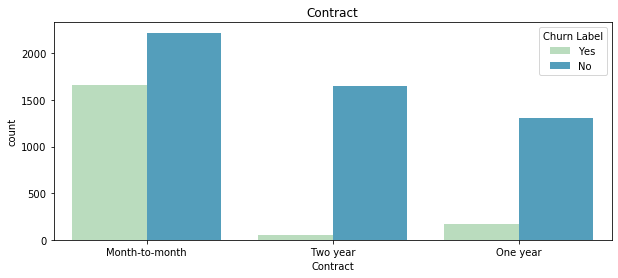

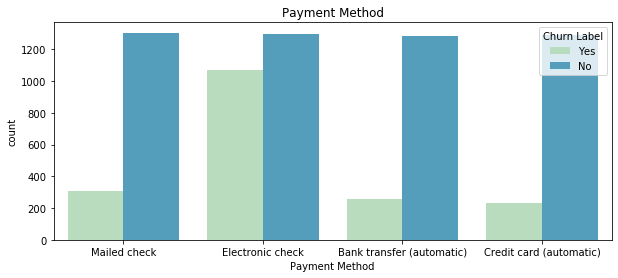

In [637]:
for col in Multivariate:
    plt.figure(figsize=(10, 4))
    plt.title(col)
    ax = sns.countplot(data=dataset, x=col, palette= 'GnBu', hue= 'Churn Label')
    plt.show()

In [638]:
Continuous = dataset[['Tenure Months', 'Total Charges', 'Monthly Charges']]

[Text(0, 0.5, 'Churn Percentage')]

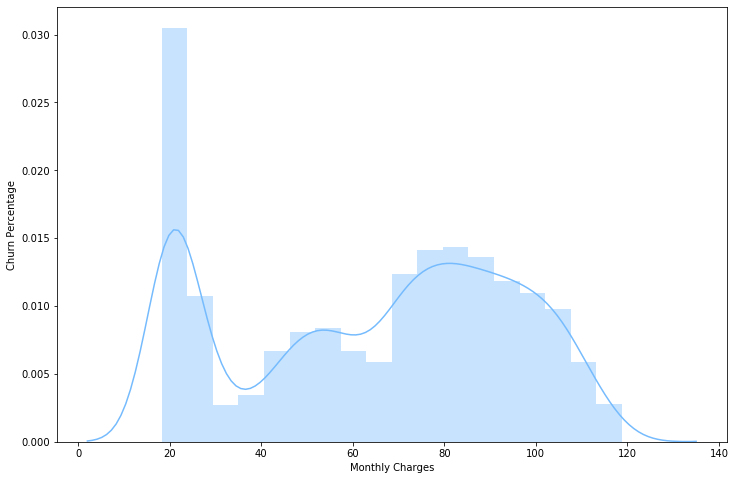

In [639]:
plt.figure(figsize=(12,8))

ax=sns.distplot(dataset['Monthly Charges'],  color= 'xkcd:sky blue')
ax.set(ylabel = "Churn Percentage")

[Text(0, 0.5, 'Churn Percentage')]

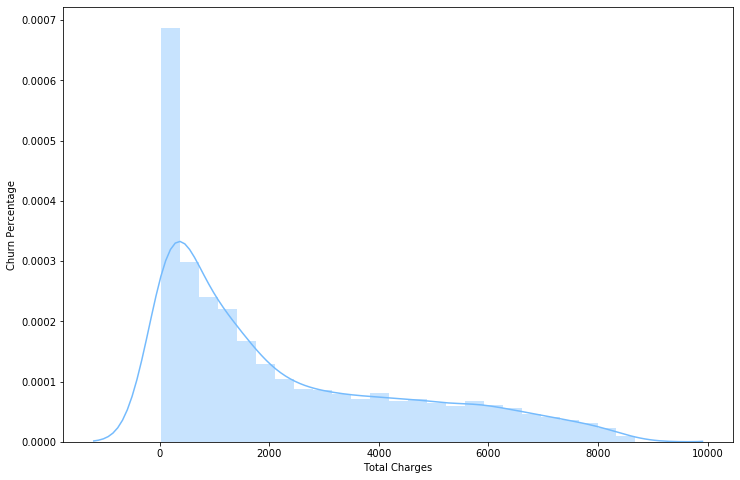

In [640]:
plt.figure(figsize=(12,8))

ax=sns.distplot(dataset['Total Charges'],  color= 'xkcd:sky blue')
ax.set(ylabel = "Churn Percentage")

[Text(0, 0.5, 'Churn Percentage')]

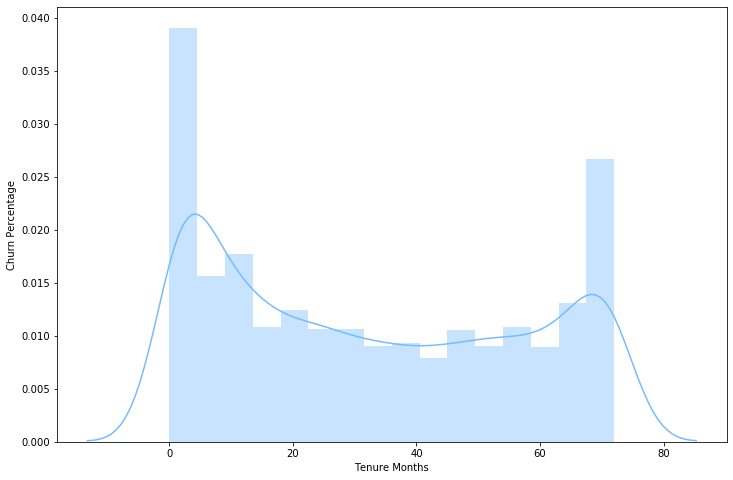

In [641]:
plt.figure(figsize=(12,8))

ax=sns.distplot(dataset['Tenure Months'],  color= 'xkcd:sky blue')
ax.set(ylabel = "Churn Percentage")

In [642]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
dataset['Gender'] = labelencoder.fit_transform(dataset['Gender'])
dataset['Senior Citizen'] = labelencoder.fit_transform(dataset['Senior Citizen'])
dataset['Partner'] = labelencoder.fit_transform(dataset['Partner'])
dataset['Dependents'] = labelencoder.fit_transform(dataset['Dependents'])
dataset['Phone Service'] = labelencoder.fit_transform(dataset['Phone Service'])
dataset['Paperless Billing'] = labelencoder.fit_transform(dataset['Paperless Billing'])

Text(0, 0.5, 'Churn Correlation')

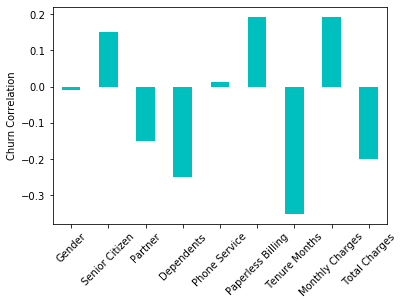

In [643]:
dataset2=dataset[['Gender','Senior Citizen', 'Partner','Dependents','Phone Service', 'Paperless Billing', 'Tenure Months', 'Monthly Charges','Total Charges']]



correlations = dataset2.corrwith(dataset['Churn Value'])

correlations.plot.bar(color= 'c', rot=45)

plt.ylabel("Churn Correlation")


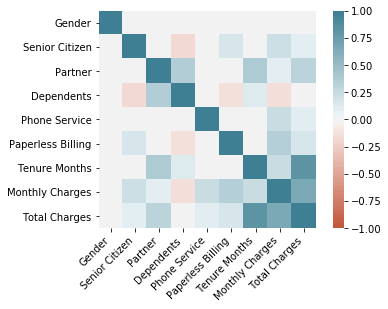

In [644]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

data = dataset2.corr()

ax = sns.heatmap(
    data, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [645]:
identity = dataset['CustomerID']

In [646]:
dataset.drop(['Zip Code','CustomerID', 'Count', 'State', 'Country', 'Lat Long', 'Latitude', 'Longitude','City','Churn Label'], axis=1, inplace=True)

In [647]:
Variables = ['Gender','Senior Citizen','Partner','Dependents','Phone Service','Paperless Billing','Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Payment Method', 'Contract']
dataset = pd.get_dummies(dataset, columns=Variables, drop_first=True)


In [648]:
# Scaling Continuos Variables

sc = MinMaxScaler()
dataset['Tenure Months']=sc.fit_transform(dataset[['Tenure Months']])
dataset['Total Charges']=sc.fit_transform(dataset[['Total Charges']])
dataset['Monthly Charges']=sc.fit_transform(dataset[['Monthly Charges']])


In [649]:

dataset = pd.concat([dataset, identity], axis = 1)

y = dataset['Churn Value']

X = dataset.drop(['Churn Value'], axis=1)



In [650]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

train_identity = X_train['CustomerID']
X_train = X_train.drop(columns = ['CustomerID'])
test_identity = X_test['CustomerID']
X_test = X_test.drop(columns = ['CustomerID'])

sm = SMOTE(random_state=1234)

X_sm, y_sm = sm.fit_resample(X_train, y_train)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100



Shape of X before SMOTE: (7043, 32)
Shape of X after SMOTE: (8278, 31)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: Churn Value, dtype: float64

ROC AUC: 0.769399881164587
f1_score: 0.648910411622276
accuracy: 0.794180269694819
precision: 0.5929203539823009
recall: 0.7165775401069518
[[851 184]
 [106 268]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1035
           1       0.59      0.72      0.65       374

    accuracy                           0.79      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.81      0.79      0.80      1409



C:\Users\oscar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


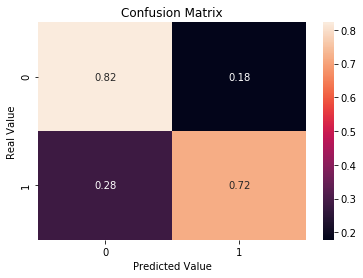

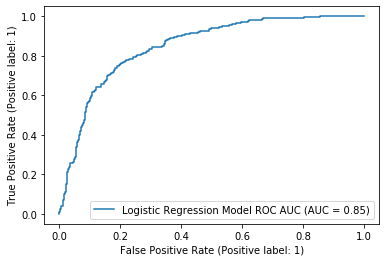

In [651]:
#LOGISTIC REGRESSION


log_model = LogisticRegression()
log_model.fit(X_sm, y_sm)
log_pred =  log_model.predict(X_test)

log_roc_auc_score_default = roc_auc_score(y_test, log_pred)
log_accuracy_default = accuracy_score(y_test, log_pred)

print("ROC AUC:",roc_auc_score(y_test, log_pred))
print("f1_score:",f1_score(y_test, log_pred))
print("accuracy:",metrics.accuracy_score(y_test, log_pred))
print("precision:",metrics.precision_score(y_test, log_pred))
print("recall:",metrics.recall_score(y_test, log_pred))

print(confusion_matrix(y_test, log_pred))
# classification report
print(classification_report(y_test, log_pred))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, log_pred, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

#Visualization ROC Curve

plot_roc_curve(log_model ,
               X_test,
               y_test,
               name='Logistic Regression Model ROC AUC');




ROC AUC: 0.7510320597277118
f1_score: 0.6338215712383489
accuracy: 0.8048261178140526
precision: 0.6312997347480106
recall: 0.6363636363636364
[[896 139]
 [136 238]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1035
           1       0.63      0.64      0.63       374

    accuracy                           0.80      1409
   macro avg       0.75      0.75      0.75      1409
weighted avg       0.81      0.80      0.81      1409



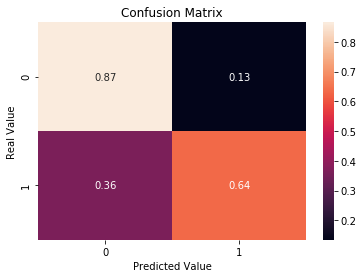

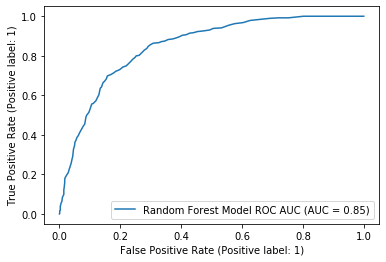

In [652]:
#RANDOM FOREST
RForest = RandomForestClassifier()
RForest.fit(X_sm, y_sm)
forest_pred= RForest.predict(X_test)

RForest_roc_auc_score_default = roc_auc_score(y_test, forest_pred)
RForesr_accuracy_default = accuracy_score(y_test, forest_pred)

print("ROC AUC:",roc_auc_score(y_test, forest_pred))
print("f1_score:",f1_score(y_test, forest_pred))
print("accuracy:",metrics.accuracy_score(y_test, forest_pred))
print("precision:",metrics.precision_score(y_test, forest_pred))
print("recall:",metrics.recall_score(y_test, forest_pred))

print(confusion_matrix(y_test, forest_pred))

# classification report
print(classification_report(y_test, forest_pred))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, forest_pred, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

plot_roc_curve(RForest ,
               X_test,
               y_test,
               name='Random Forest Model ROC AUC');

ROC AUC: 0.5544382443359426
f1_score: 0.3763919821826281
accuracy: 0.602555003548616
precision: 0.32251908396946566
recall: 0.45187165775401067
[[680 355]
 [205 169]]
              precision    recall  f1-score   support

           0       0.77      0.66      0.71      1035
           1       0.32      0.45      0.38       374

    accuracy                           0.60      1409
   macro avg       0.55      0.55      0.54      1409
weighted avg       0.65      0.60      0.62      1409



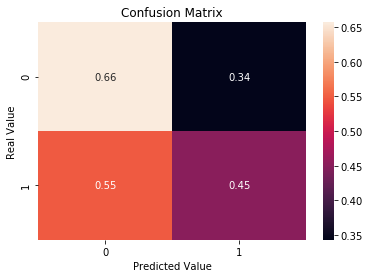

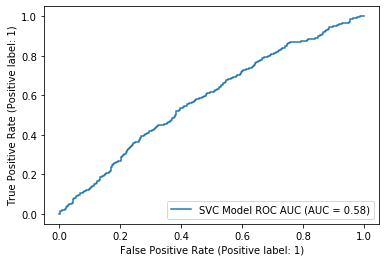

In [653]:
#SUPPORT VECTOR MACHINE


# Applying Support Vector Machine algorithm
from sklearn.svm import SVC  
svclassifier = SVC()  
svclassifier.fit(X_sm, y_sm)  
# Predicting part, applying the model to predict
y_pred = svclassifier.predict(X_test)  

print("ROC AUC:",roc_auc_score(y_test, y_pred))
print("f1_score:",f1_score(y_test, y_pred))
print("accuracy:",metrics.accuracy_score(y_test, y_pred))
print("precision:",metrics.precision_score(y_test, y_pred))
print("recall:",metrics.recall_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

#Visualization ROC Curve

plot_roc_curve(svclassifier,
               X_test,
               y_test,
               name='SVC Model ROC AUC');

C:\Users\oscar\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:48:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ROC AUC: 0.7324278591542018
f1_score: 0.6084583901773534
accuracy: 0.7963094393186657
precision: 0.6211699164345403
recall: 0.5962566844919787
[[899 136]
 [151 223]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1035
           1       0.62      0.60      0.61       374

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.74      1409
weighted avg       0.79      0.80      0.79      1409



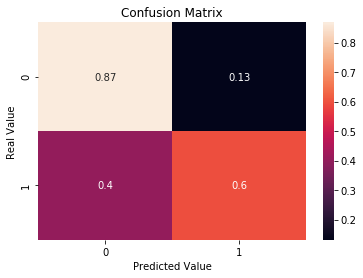

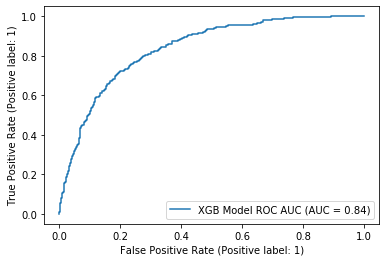

In [654]:
#XGBOOST


xgb_model = XGBClassifier()

xgb_model.fit(X_sm, y_sm)

y_pred = xgb_model.predict(X_test)
predictions = [round(value) for value in y_pred]

print("ROC AUC:",roc_auc_score(y_test, predictions))
print("f1_score:",f1_score(y_test, predictions))
print("accuracy:",metrics.accuracy_score(y_test, predictions))
print("precision:",metrics.precision_score(y_test, predictions))
print("recall:", metrics.recall_score(y_test, predictions))

print(confusion_matrix(y_test, predictions))

# classification report
print(classification_report(y_test, predictions))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, predictions, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

#Visualization ROC Curve

plot_roc_curve(xgb_model,
               X_test,
               y_test,
               name='XGB Model ROC AUC');

In [655]:
XGBOOST =  XGBClassifier(random_state = 0)
XGBOOST.fit(X_train, y_train)
# Predict the Test set results
y_pred = XGBOOST.predict(X_test)
#probability score
y_pred_probs = XGBOOST.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

C:\Users\oscar\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:48:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [656]:
y_test

6692    0
2624    0
1076    1
1428    1
7026    0
       ..
5368    0
5612    0
5715    0
3302    0
2918    0
Name: Churn Value, Length: 1409, dtype: int64

In [657]:



final_results = pd.concat([identity, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results["propensity_to_churn(%)"] = y_pred_probs
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100
final_results["propensity_to_churn(%)"]=final_results["propensity_to_churn(%)"].round(2)
final_results = final_results[['CustomerID', 'Churn Value', 'predictions', 'propensity_to_churn(%)']]
final_results ['Ranking'] = pd.qcut(final_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
print (final_results)

      CustomerID  Churn Value  predictions  propensity_to_churn(%) Ranking
5     4190-MFLUW          1.0            0                7.150000       6
6     8779-QRDMV          1.0            1               94.180000       1
14    7760-OYPDY          1.0            0               27.700001       4
19    5919-TMRGD          1.0            1               76.220001       1
25    0486-HECZI          1.0            0                2.670000       7
...          ...          ...          ...                     ...     ...
7029  2823-LKABH          0.0            0               36.630001       3
7030  0550-DCXLH          0.0            0                0.020000      10
7031  9281-CEDRU          0.0            0                0.490000       8
7035  9767-FFLEM          0.0            0               30.780001       4
7036  8456-QDAVC          0.0            0                1.270000       8

[1409 rows x 5 columns]


In [658]:
final_results.sort_values(by='Ranking', ascending=False)

,CustomerID,Churn Value,predictions,propensity_to_churn(%),Ranking
5853,0292-WEGCH,0.0,1,98.690002,1
3459,6635-CPNUN,0.0,1,80.309998,1
6094,3580-GICBM,0.0,1,77.750000,1
2593,5002-GCQFH,0.0,1,94.860001,1
6080,4072-IPYLT,0.0,1,89.739998,1
...,...,...,...,...,...
6583,6728-CZFEI,0.0,0,0.020000,10
5429,2664-XJZNO,0.0,0,0.050000,10
669,3269-ATYWD,1.0,0,0.030000,10
3382,5248-KWLAR,0.0,0,0.110000,10


In [659]:
dataset = pd.read_excel('Telco_customer_churn (3).xlsx')

Latitude =  dataset['Latitude']

Longitude = dataset['Longitude']

real_final_results=pd.concat([final_results, Latitude, Longitude], axis=1).dropna()

In [660]:
import pandas as pd


df = pd.DataFrame(real_final_results)

df.to_excel (r'C:\Users\Oscar\Downloads\datos_mapa.xlsx', index = False, header=True)

print (df)

      CustomerID  Churn Value  predictions  propensity_to_churn(%) Ranking  \
5     4190-MFLUW          1.0          0.0                7.150000       6   
6     8779-QRDMV          1.0          1.0               94.180000       1   
14    7760-OYPDY          1.0          0.0               27.700001       4   
19    5919-TMRGD          1.0          1.0               76.220001       1   
25    0486-HECZI          1.0          0.0                2.670000       7   
...          ...          ...          ...                     ...     ...   
7029  2823-LKABH          0.0          0.0               36.630001       3   
7030  0550-DCXLH          0.0          0.0                0.020000      10   
7031  9281-CEDRU          0.0          0.0                0.490000       8   
7035  9767-FFLEM          0.0          0.0               30.780001       4   
7036  8456-QDAVC          0.0          0.0                1.270000       8   

       Latitude   Longitude  
5     34.066367 -118.309868  
6  